# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ignore all warnings
warnings.filterwarnings("ignore")

In [6]:
import bioreactor
bioreactor.__version__

'0.3.9'

In [7]:
import numba
numba.__version__

'0.59.1'

In [2]:
register_matplotlib_converters()

# Read Data

In [3]:
data_all = pd.read_csv('data_summarized_by_month_filled.tsv', sep='\t')
data_all

,hosp,year,month,type,Всего_с_ОНМК,Не_подтвержден_ОНМК,Госпитализированы_с_ОНМК,Пролечены_с_ОНМК_Всего,Внутрибольничные_ОНМК,ИИ_Ишемический_Инсульт,...,Летальные_Исходы_1_Сутки,Выписаны_Всего,Ривермид_1_Балл,Ривермид_2_4_Балла,Ривермид_5_8_Баллов,Ривермид_9_Баллов,Суммарная_Загрузка_ОНМК,Суммарно_Госпитализировано,Тромболизис,Летальные_Исходы
0,alm,2017,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,31.0,0.0,4.0
1,alm,2017,2,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,23.0,1.0,3.0
2,alm,2017,3,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,33.0,30.0,1.0,3.0
3,alm,2017,4,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.0,33.0,1.0,3.0
4,alm,2017,5,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,33.0,31.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,mcs,2024,8,3,30.0,9.0,21.0,21.0,0.0,14.0,...,0.0,19.0,2.0,0.0,3.0,14.0,30.0,21.0,0.0,2.0
1532,mcs,2024,9,3,17.0,6.0,11.0,11.0,0.0,10.0,...,0.0,11.0,2.0,0.0,1.0,8.0,17.0,11.0,0.0,0.0
1533,mcs,2024,10,3,39.0,39.0,0.0,26.0,0.0,19.0,...,0.0,24.0,5.0,2.0,2.0,15.0,39.0,0.0,2.0,2.0
1534,mcs,2024,11,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_all.columns

Index(['hosp', 'year', 'month', 'type', 'Всего_с_ОНМК', 'Не_подтвержден_ОНМК',
       'Госпитализированы_с_ОНМК', 'Пролечены_с_ОНМК_Всего',
       'Внутрибольничные_ОНМК', 'ИИ_Ишемический_Инсульт',
       'ТИА_Транзиторная_Ишемическая_Атака', 'ГИ_Геморрагический_Инсульт',
       'ВМК_ВЖК', 'САК_Неподтвержденная_Аневризма', 'Кровоизлияние_АВМ',
       'САК_Аневризма', 'Терапевтическое_Окно_4_5ч', 'ИИ_Терапевтическое_Окно',
       'ГИ_Терапевтическое_Окно', 'Переведены_ПСО_РСЦ', 'ГИ_Переведены_до_48ч',
       'ИИ_Переведены_до_12ч', 'ИИ_Переведены_до_2_недель',
       'Направлены_на_Реабилитацию', 'II_Этап_Реабилитация',
       'III_Этап_Реабилитация', 'Паллиативное_Лечение', 'Сестринский_Уход',
       'Амбулаторное_Лечение', 'Собственная_Реабилитация_II_Этап',
       'Младше_45_лет', 'От_45_до_60_лет', 'Старше_60_лет', 'NIHSS_Меньше_4',
       'NIHSS_Больше_21', 'NIHSS_5_20', 'Тромбэкстракция',
       'Комбинированная_Реперфузия', 'Реваскуляризация_Острый_Период',
       'ГИ_Всего', 'Ле

In [9]:
data_all.loc[:, 'Date'] = pd.to_datetime(data_all[['year', 'month']].assign(Day=1))
data_all.loc[:, 'Date_Graph'] = pd.to_datetime(data_all[['year', 'month']].assign(Day=1)).dt.strftime('%Y-%m')

In [12]:
data_all.hosp.unique()

array(['alm', 'b1', 'b15', 'b16', 'b17', 'b2', 'b26', 'b3', 'b33', 'b37',
       'b38', 'b4', 'b40', 'bsp', 'gvv', 'mcs'], dtype=object)

# Taking Most Hospitals

In [18]:
main_column = 'Суммарная_Загрузка_ОНМК'

In [42]:
# Берем все, кроме med1
data_used = data_all.loc[~data_all.hosp.isin(["med1"])]

# Берем основные колонки
data_used = data_used.loc[:, [main_column, 'Date', 'Date_Graph', 'year', 'month']]

# Группируем и суммируем по госпиталям
data_used = data_used.groupby(['Date', 'Date_Graph', 'year', 'month']).sum().reset_index()

In [43]:
# Берем все время до ноября 2024
data_used = data_used.loc[data_used.Date < pd.to_datetime("2024-10-31")]

In [44]:
data_used

,Date,Date_Graph,year,month,Суммарная_Загрузка_ОНМК
0,2017-01-01,2017-01,2017,1,2038.0
1,2017-02-01,2017-02,2017,2,2791.0
2,2017-03-01,2017-03,2017,3,3089.0
3,2017-04-01,2017-04,2017,4,2440.0
4,2017-05-01,2017-05,2017,5,2489.0
...,...,...,...,...,...
89,2024-06-01,2024-06,2024,6,2103.0
90,2024-07-01,2024-07,2024,7,1913.0
91,2024-08-01,2024-08,2024,8,2635.0
92,2024-09-01,2024-09,2024,9,1955.0


# First Plottings

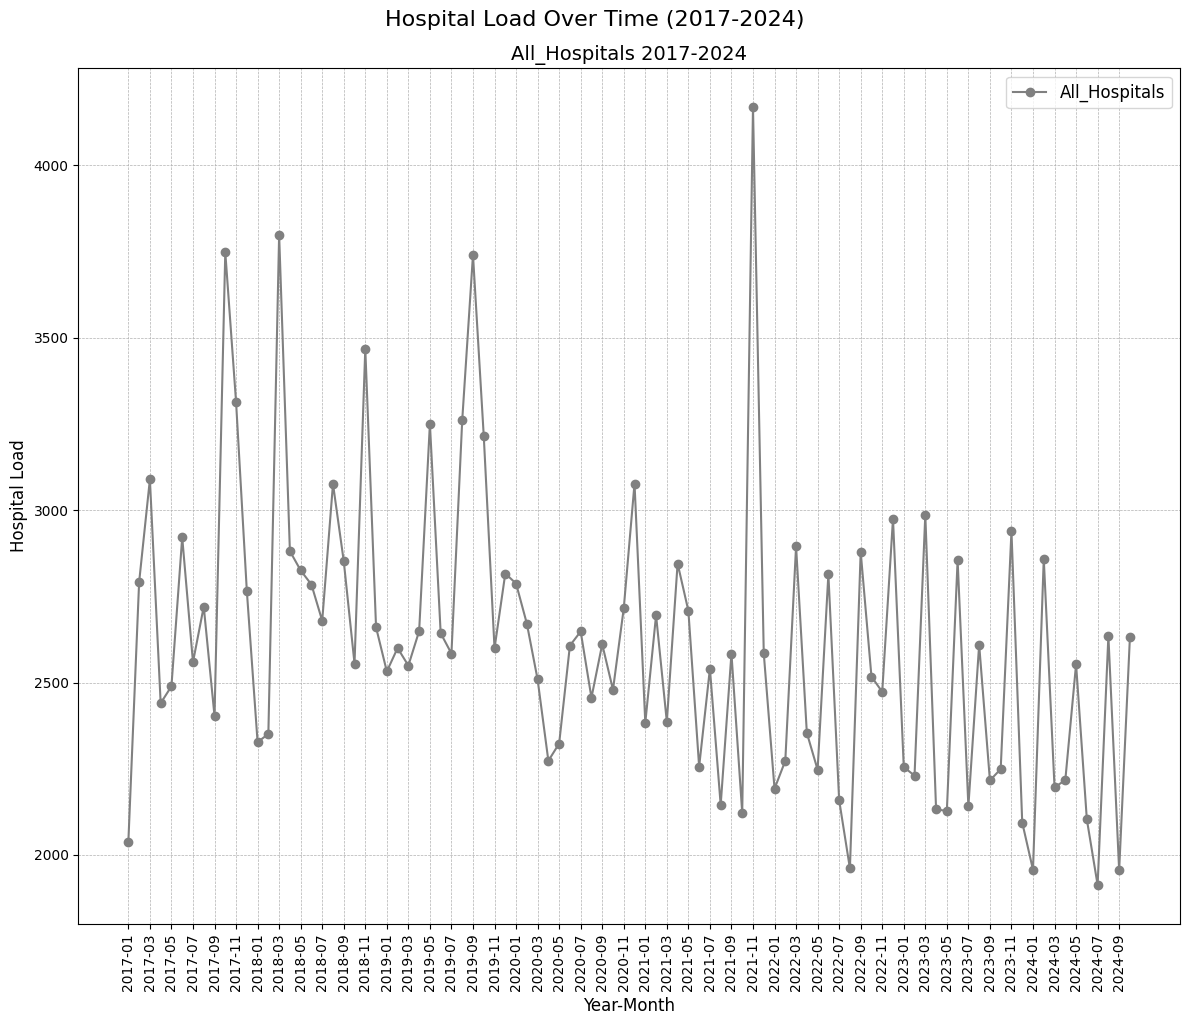

In [49]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Copy the data to avoid modifying the original
data_plot = data_used.copy()

# Plot the data
ax.plot(data_plot['Date_Graph'], data_plot[main_column], 
        label="All_Hospitals", marker='o', color="gray")

# Set the title and labels
ax.set_title("All_Hospitals 2017-2024", fontsize=14)
ax.set_xlabel("Year-Month", fontsize=12)
ax.set_ylabel("Hospital Load", fontsize=12)

# Set the xticks and labels
xticks = np.arange(len(data_plot.Date_Graph))  # Index positions
skip_ticks = xticks[::2]  # Take every third tick
ax.set_xticks(skip_ticks)
ax.set_xticklabels(data_plot['Date_Graph'].iloc[skip_ticks], rotation=90)

# Add grid and legend
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)

# Adjust layout and add a super title
plt.tight_layout()
plt.suptitle("Hospital Load Over Time (2017-2024)", fontsize=16, y=1.02)

# Show the plot
plt.show()

# DF test

## Dickey-Fuller test w/o differencing

In [50]:
from statsmodels.tsa.stattools import adfuller

In [69]:
data_plot = data_used.copy()
data_plot.set_index('Date', inplace=True)
data_plot = data_plot.dropna().fillna(0)

# Perform the Dickey-Fuller test
result = adfuller(data_plot[main_column])

# Display results
print(f'*** {"All_Hospitals"} ***')
print("Dickey-Fuller Test Results:")
print(f"Test Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Number of Lags Used: {result[2]}")
print(f"Number of Observations Used: {result[3]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

*** All_Hospitals ***
Dickey-Fuller Test Results:
Test Statistic: -1.8683009348121336
p-value: 0.3471170841105324
Number of Lags Used: 5
Number of Observations Used: 88
Critical Values:
   1%: -3.506944401824286
   5%: -2.894989819214876
   10%: -2.584614550619835


Нет стационарности!

## Dickey-Fuller test with differencing

In [70]:
data_plot = data_used.copy()
data_plot.set_index('Date', inplace=True)
data_plot = data_plot.dropna().fillna(0)

series = data_plot[main_column].diff(1).dropna()

# Perform the Dickey-Fuller test
result = adfuller(series)

# Display results
print(f'*** {"All_Hospitals"} ***')
print("Dickey-Fuller Test Results:")
print(f"Test Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Number of Lags Used: {result[2]}")
print(f"Number of Observations Used: {result[3]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

*** All_Hospitals ***
Dickey-Fuller Test Results:
Test Statistic: -7.7587281019671615
p-value: 9.581184096229715e-12
Number of Lags Used: 4
Number of Observations Used: 88
Critical Values:
   1%: -3.506944401824286
   5%: -2.894989819214876
   10%: -2.584614550619835


Оп, уже стационарность!

# ARIMAX model

In [52]:
# берем только 2023 год
data_used_train = data_used.loc[data_used.Date < pd.to_datetime("2024-01-01")]
data_used_test = data_used.loc[data_used.Date >= pd.to_datetime("2024-01-01")]

## ACF & PACF

### W/o differencing like in ARMA (not ARIMA!)

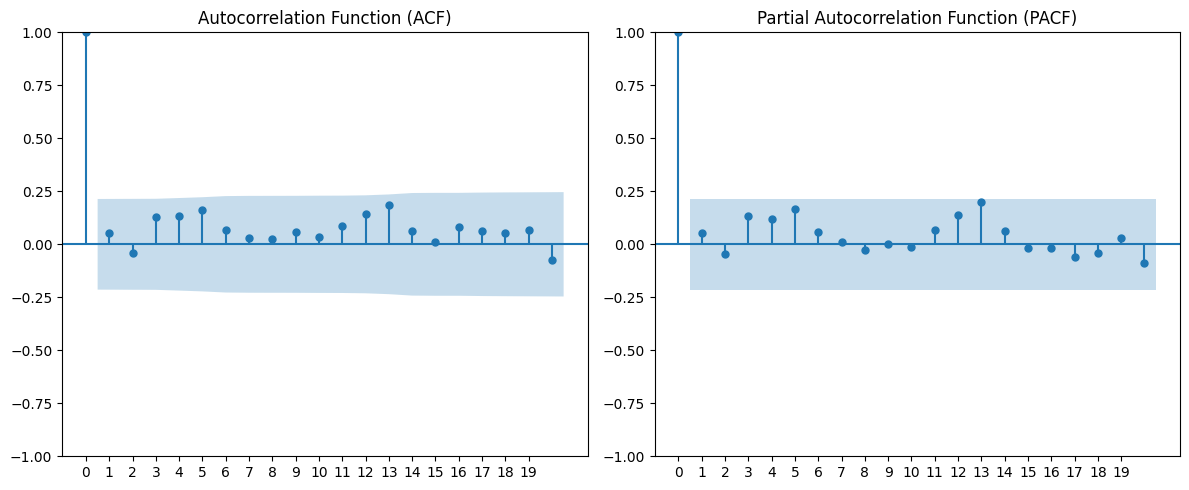

In [64]:
# Select the Load time series
load_series = pd.Series(data_used_train[main_column])

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF plot
plot_acf(load_series, ax=axes[0], lags=20)  # Adjust lags as needed
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xticks(range(0, 20))

# PACF plot
plot_pacf(load_series, ax=axes[1], lags=20, method='ywm')  # 'ywm' is robust for small samples
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xticks(range(0, 20))

plt.tight_layout()
plt.show()

Тут вообще ничего нет, модель не обучится нормально. Подозреваю, что все это из-за того, что у нас не стационарная тайм-сериес.

### Using differencing like in ARIMA

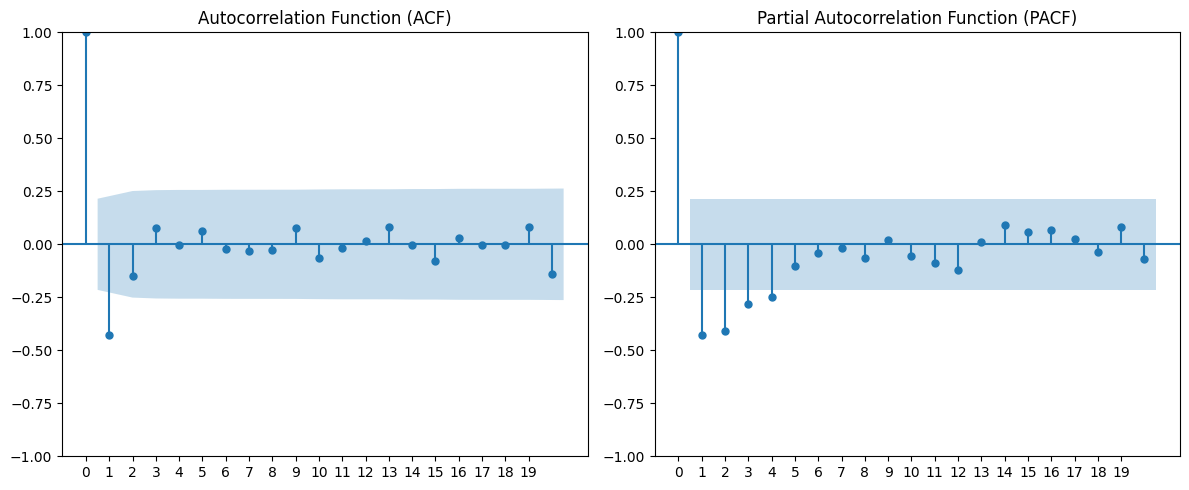

In [63]:
# Select the Load time series
load_series = pd.Series(data_used_train[main_column]).diff(1).dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF plot
plot_acf(load_series, ax=axes[0], lags=20)  # Adjust lags as needed
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xticks(range(0, 20))

# PACF plot
plot_pacf(load_series, ax=axes[1], lags=20, method='ywm')  # 'ywm' is robust for small samples
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xticks(range(0, 20))

plt.tight_layout()
plt.show()

Тут уже видим, что какие-то факторы вылезли за шум => значит нам нужна модель ARIMA(4, 1, 2)

## Model

In [72]:
from statsmodels.tsa.arima.model import ARIMA

In [145]:
# Select the Load time series
load_series = data_used_train[main_column]

# Model
model = ARIMA(load_series, order=(4, 1, 2))  # d=0 for stationary series
fitted_model = model.fit()

# Print summary of the model
print(fitted_model.summary())

# Forecast future values
forecast_steps = 12  # Number of periods to forecast
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(load_series.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

                                  SARIMAX Results                                  
Dep. Variable:     Суммарная_Загрузка_ОНМК   No. Observations:                   84
Model:                      ARIMA(4, 1, 2)   Log Likelihood                -618.636
Date:                     Mon, 20 Jan 2025   AIC                           1251.273
Time:                             20:50:40   BIC                           1268.205
Sample:                                  0   HQIC                          1258.075
                                      - 84                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9653      0.509     -1.898      0.058      -1.962       0.032
ar.L2         -0.2772      0.215     -1.292      0.196      -0.698       0.143
ar.L3       

### Fitted

In [146]:
data_check_metrics = data_used[['Date', 'Date_Graph', main_column]].copy()
data_check_metrics.loc[:, f"{main_column}_Fitted"] = fitted_model.fittedvalues
data_check_metrics.loc[:, f"{main_column}_Prediction"] = pd.concat([pd.Series([None]*84), forecast_values])
data_check_metrics.loc[:, f"{main_column}_Prediction_CI_low"] = pd.concat([pd.Series([None]*84), forecast_ci[f'lower {main_column}']])
data_check_metrics.loc[:, f"{main_column}_Prediction_CI_upp"] = pd.concat([pd.Series([None]*84), forecast_ci[f'upper {main_column}']])

data_check_metrics = data_check_metrics.loc[data_check_metrics.Date <= pd.to_datetime("2024-10-10")]

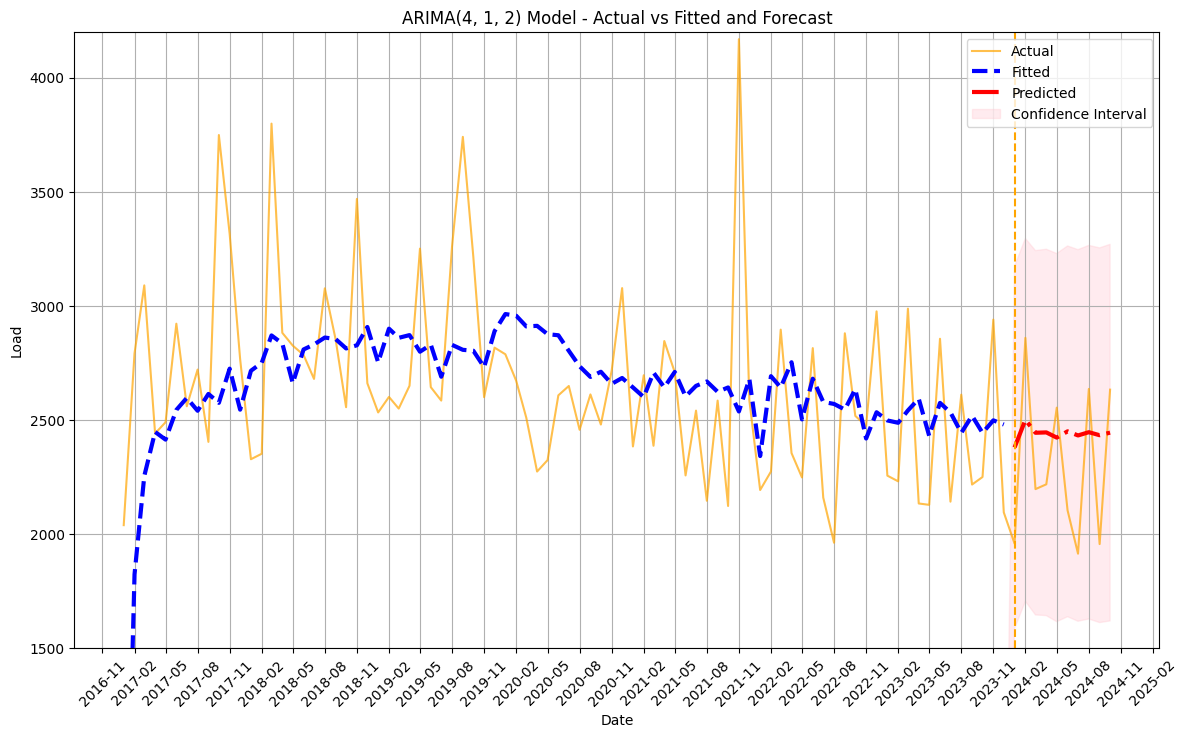

In [147]:
import matplotlib.dates as mdates

# Ensure Date_Graph is in datetime format
data_check_metrics['Date_Graph'] = pd.to_datetime(data_check_metrics['Date_Graph'], errors='coerce')

# Filter the dataset for plotting
tmp_data = data_check_metrics.fillna(0)

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(data_check_metrics['Date_Graph'], data_check_metrics[f'{main_column}'], label='Actual',
         alpha=0.7, color='orange')
plt.plot(data_check_metrics['Date_Graph'], data_check_metrics[f"{main_column}_Fitted"], 
         label='Fitted', color='blue', linestyle="dashed", linewidth=3)
plt.plot(data_check_metrics['Date_Graph'], data_check_metrics[f"{main_column}_Prediction"], 
         label='Predicted', linestyle="dashdot", linewidth=3, color='red')
plt.vlines(x=pd.to_datetime("2024-01-01"), linestyles='--', color='orange', ymin=1500, ymax=4200)

#Add confidence intervals for predictions
plt.fill_between(tmp_data['Date_Graph'], 
                 tmp_data[ f"{main_column}_Prediction_CI_low"], 
                 tmp_data[f"{main_column}_Prediction_CI_upp"], 
                 color='pink', alpha=0.3, label='Confidence Interval')

# Format x-axis ticks for every 2 months
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Major ticks every 2 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

# Rotate and align x-axis labels
plt.xticks(rotation=45)

# Add titles and labels
plt.title('ARIMA(4, 1, 2) Model - Actual vs Fitted and Forecast')
plt.xlabel('Date')
plt.ylabel('Load')
plt.ylim(1500, 4200)
plt.legend()
plt.grid()
plt.show()

### Forecast

In [148]:
tmp_data = data_check_metrics.loc[data_check_metrics.Date_Graph > pd.to_datetime("2023-11-30")].fillna(190)
tmp_data.loc[tmp_data["Date"] == pd.to_datetime("2023-12-01"), f"{main_column}_Prediction"] = data_check_metrics.loc[data_check_metrics["Date"] == pd.to_datetime("2023-12-01"), f"{main_column}_Fitted"]

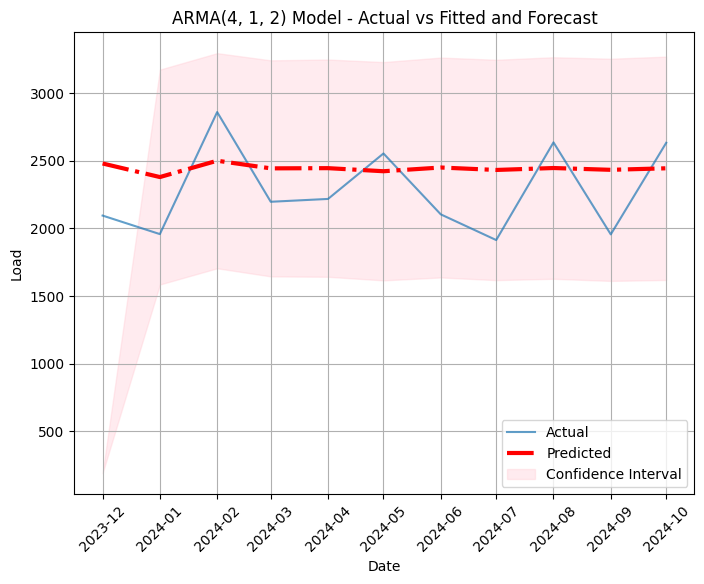

In [149]:
import matplotlib.dates as mdates

# Ensure Date_Graph is in datetime format
data_check_metrics['Date_Graph'] = pd.to_datetime(data_check_metrics['Date_Graph'], errors='coerce')

# Filter the dataset for plotting
tmp_data = data_check_metrics.loc[data_check_metrics.Date_Graph > pd.to_datetime("2023-11-30")].fillna(190)
tmp_data.loc[tmp_data["Date"] == pd.to_datetime("2023-12-01"), 
                f"{main_column}_Prediction"] = data_check_metrics.loc[data_check_metrics["Date"] == pd.to_datetime("2023-12-01"), f"{main_column}_Fitted"]

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(tmp_data['Date_Graph'], tmp_data[main_column], label='Actual', alpha=0.7)
#plt.plot(tmp_data['Date_Graph'], tmp_data['Prolecheno_Fitted'], label='Fitted', color='blue', linestyle="dashed", linewidth=3)
plt.plot(tmp_data['Date_Graph'], tmp_data[f"{main_column}_Prediction"], label='Predicted', linestyle="dashdot", linewidth=3, color='red')
#plt.vlines(x=pd.to_datetime("2024-01-01"), linestyles='--', color='orange', ymin=200, ymax=550)

#Add confidence intervals for predictions
plt.fill_between(tmp_data['Date_Graph'], 
                 tmp_data[f"{main_column}_Prediction_CI_low"].iloc[:], 
                 tmp_data[f"{main_column}_Prediction_CI_upp"], 
                 color='pink', alpha=0.3, label='Confidence Interval')

# Format x-axis ticks for every 2 months
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Major ticks every 2 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

# Rotate and align x-axis labels
plt.xticks(rotation=45)

# Add titles and labels
plt.title('ARMA(4, 1, 2) Model - Actual vs Fitted and Forecast')
plt.xlabel('Date')
plt.ylabel('Load')
#plt.ylim(200, 600)
plt.legend()
plt.grid()
plt.show()

### Model Check

Mean Squared Error (MSE): 226855.1411
Mean Absolute Error (MAE): 345.8872
Root Mean Squared Error (RMSE): 476.2931


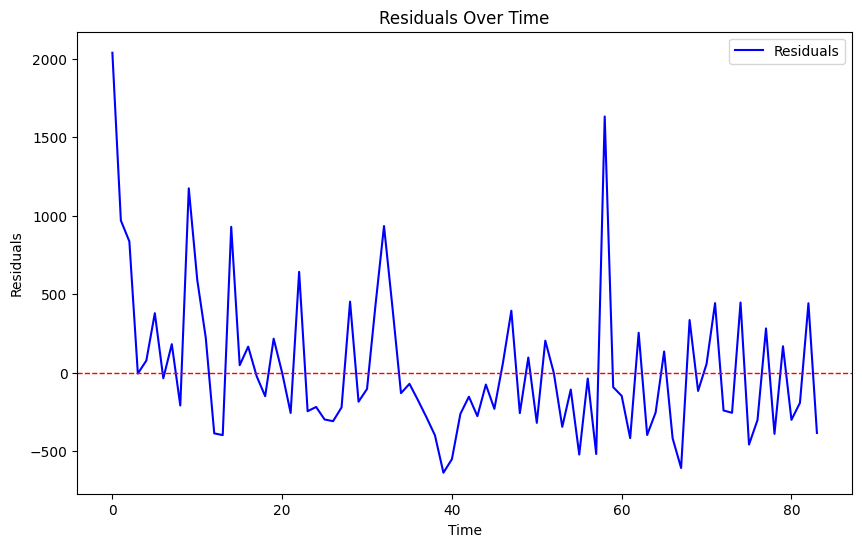

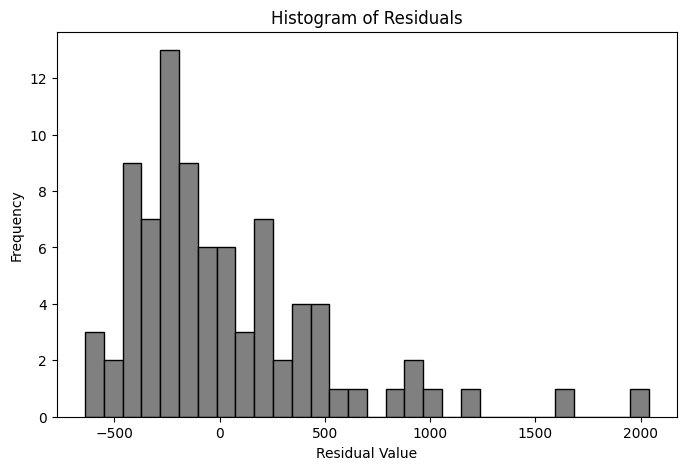

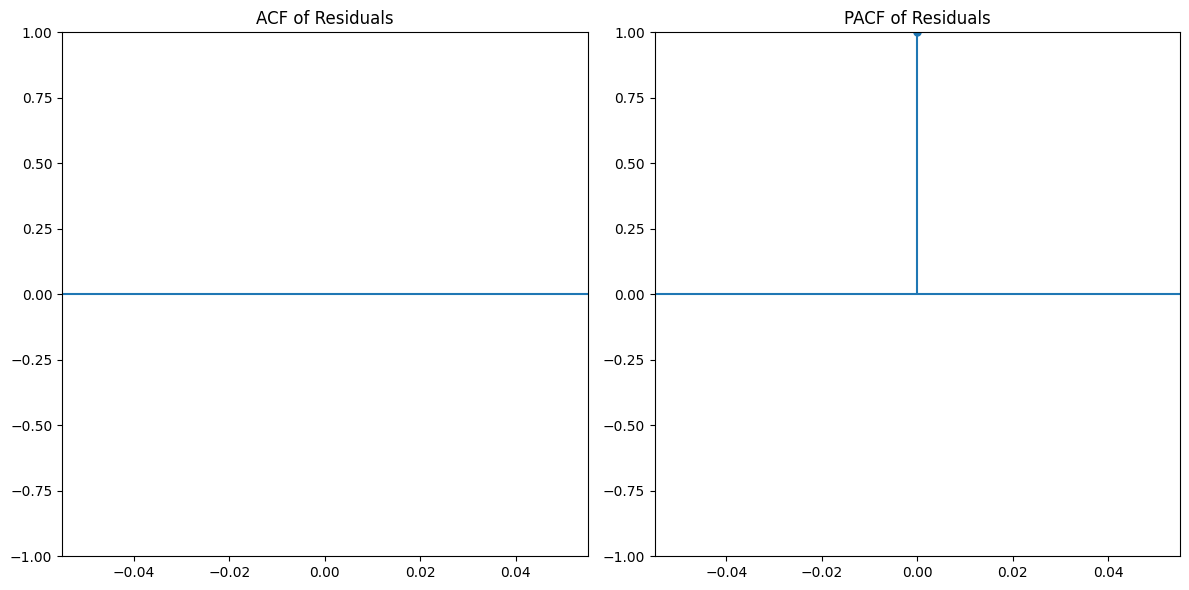

In [150]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assume `df` is your DataFrame with columns 'real' and 'fitted'
# Replace 'real' and 'fitted' with your actual column names
real = data_check_metrics[main_column].iloc[0:train_size]
fitted = data_check_metrics[f"{main_column}_Fitted"].iloc[0:train_size]

# Calculate residuals
data_check_metrics['residuals'] = real - fitted

# Calculate performance metrics
mse = mean_squared_error(real, fitted)
mae = mean_absolute_error(real, fitted)
rmse = mse ** 0.5

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Residuals plot
plt.figure(figsize=(10, 6))
plt.plot(data_check_metrics['residuals'], label='Residuals', color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(data_check_metrics['residuals'], bins=30, color='gray', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

# ACF and PACF of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(data_check_metrics['residuals'], lags=40, ax=plt.gca(), title="ACF of Residuals")
plt.subplot(1, 2, 2)
plot_pacf(data_check_metrics['residuals'], lags=40, ax=plt.gca(), title="PACF of Residuals")
plt.tight_layout()
plt.show()

In [151]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test on residuals
# df['residuals'] should already be computed
ljung_box_results = acorr_ljungbox(data_check_metrics['residuals'].dropna(), lags=[10], return_df=True)

# Display results
print(ljung_box_results)

     lb_stat  lb_pvalue
10  6.483994   0.773095


### Metrics

In [99]:
# Calculate metrics - train
mae = np.mean(np.abs(data_check_metrics[main_column] - data_check_metrics[f"{main_column}_Fitted"]))  # Mean Absolute Error
mse = np.mean((data_check_metrics[main_column] - data_check_metrics[f"{main_column}_Fitted"]) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mape = np.mean(np.abs((data_check_metrics[main_column] - data_check_metrics[f"{main_column}_Fitted"]) / data_check_metrics[main_column])) * 100  # Mean Absolute Percentage Error

# Print metrics
print("*** TRAIN ***")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

*** TRAIN ***
MAE: 345.89
MSE: 226855.14
RMSE: 476.29
MAPE: 13.03%


In [101]:
# Calculate metrics
mae = np.mean(np.abs(data_check_metrics[main_column] - data_check_metrics[f"{main_column}_Prediction"]))  # Mean Absolute Error
mse = np.mean((data_check_metrics[main_column] - data_check_metrics[f"{main_column}_Prediction"]) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mape = np.mean(np.abs((data_check_metrics[main_column] - data_check_metrics[f"{main_column}_Prediction"]) / data_check_metrics[main_column])) * 100  # Mean Absolute Percentage Error

# Print metrics
print("*** TEST ***")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

*** TEST ***
MAE: 310.67
MSE: 112465.31
RMSE: 335.36
MAPE: 14.31%


# Prophet

In [109]:
# Делим выборку на две части
data_model_train = data_used.loc[data_used.Date < pd.to_datetime("2024-01-01")]
data_model_test = data_used.loc[data_used.Date >= pd.to_datetime("2024-01-01")]

20:30:30 - cmdstanpy - INFO - Chain [1] start processing
20:30:31 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

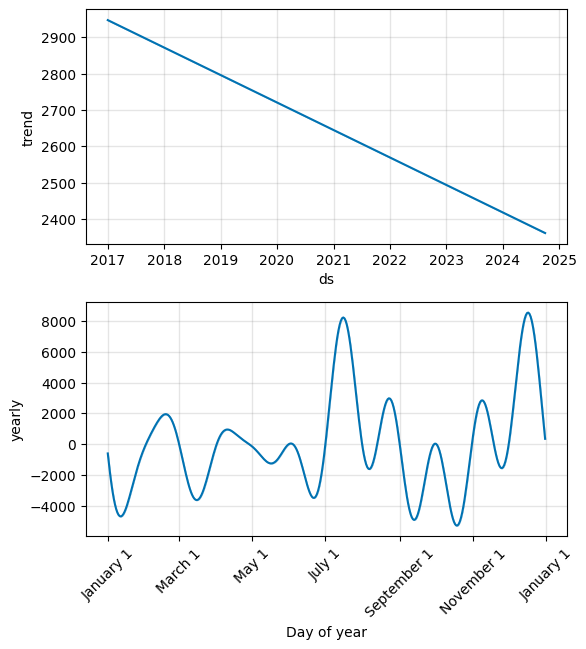

In [110]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Prepare the data for Prophet
# Ensure your DataFrame has 'Date' and 'Пролечены_с_ОНМК_Всего' columns
prophet_data = data_model_train[['Date', main_column]].rename(columns={'Date': 'ds', main_column: 'y'})

# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(prophet_data)

# Create a DataFrame for future predictions (extend the time range if necessary)
future = model.make_future_dataframe(periods=data_model_test.shape[0], freq='MS')  # Forecast 12 months into the future
forecast = model.predict(future)

plt.tight_layout()
plt.show()

# Plot forecast components (trend, seasonality, etc.)
fig2 = model.plot_components(forecast, figsize=(6, 6))
plt.xticks(rotation=45)
plt.show()

### Forecasting

In [113]:
train_size

84

In [118]:
data_check_metrics

,index,Date,Date_Graph,Суммарная_Загрузка_ОНМК,Суммарная_Загрузка_ОНМК_Fitted
0,0,2017-01-01,2017-01,2038.0,2346.912157
1,1,2017-02-01,2017-02,2791.0,2802.763337
2,2,2017-03-01,2017-03,3089.0,3058.270767
3,3,2017-04-01,2017-04,2440.0,2781.216582
4,4,2017-05-01,2017-05,2489.0,2782.539013
...,...,...,...,...,...
89,89,2024-06-01,2024-06,2103.0,None
90,90,2024-07-01,2024-07,1913.0,None
91,91,2024-08-01,2024-08,2635.0,None
92,92,2024-09-01,2024-09,1955.0,None


In [119]:
pd.concat([pd.Series([None]*train_size), predicted]).values

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None], dtype=object)

In [123]:
data_check_metrics = data_used[['Date', 'Date_Graph', main_column]].copy()
data_check_metrics = data_check_metrics.reset_index()

train_size = data_model_train.shape[0]
test_size = data_model_test.shape[0]

fitted = forecast.iloc[0:train_size]['yhat']
data_check_metrics[f"{main_column}_Fitted"] = pd.concat([fitted, pd.Series([None]*test_size)]).values

# Add Predictions and Confidence Intervals
predicted = forecast.iloc[train_size:data_used.shape[0]]['yhat']
data_check_metrics[f"{main_column}_Prediction"] = pd.concat([pd.Series([None]*train_size), predicted]).values

data_check_metrics[f"{main_column}_Prediction_CI_low"] = forecast['yhat_lower'].values
    
data_check_metrics[f"{main_column}_Prediction_CI_upp"] = forecast['yhat_upper'].values

# Display resulting DataFrame
data_check_metrics

,index,Date,Date_Graph,Суммарная_Загрузка_ОНМК,Суммарная_Загрузка_ОНМК_Fitted,Суммарная_Загрузка_ОНМК_Prediction,Суммарная_Загрузка_ОНМК_Prediction_CI_low,Суммарная_Загрузка_ОНМК_Prediction_CI_upp
0,0,2017-01-01,2017-01,2038.0,2346.912157,None,1936.568774,2778.987535
1,1,2017-02-01,2017-02,2791.0,2802.763337,None,2394.137900,3215.094949
2,2,2017-03-01,2017-03,3089.0,3058.270767,None,2648.083156,3480.671385
3,3,2017-04-01,2017-04,2440.0,2781.216582,None,2372.846886,3203.944820
4,4,2017-05-01,2017-05,2489.0,2782.539013,None,2403.399937,3211.547396
...,...,...,...,...,...,...,...,...
89,89,2024-06-01,2024-06,2103.0,None,2412.843686,2003.298241,2838.635209
90,90,2024-07-01,2024-07,1913.0,None,2460.165146,2058.105337,2874.374016
91,91,2024-08-01,2024-08,2635.0,None,2085.630226,1639.147639,2499.122840
92,92,2024-09-01,2024-09,1955.0,None,2202.42851,1798.255134,2574.429340


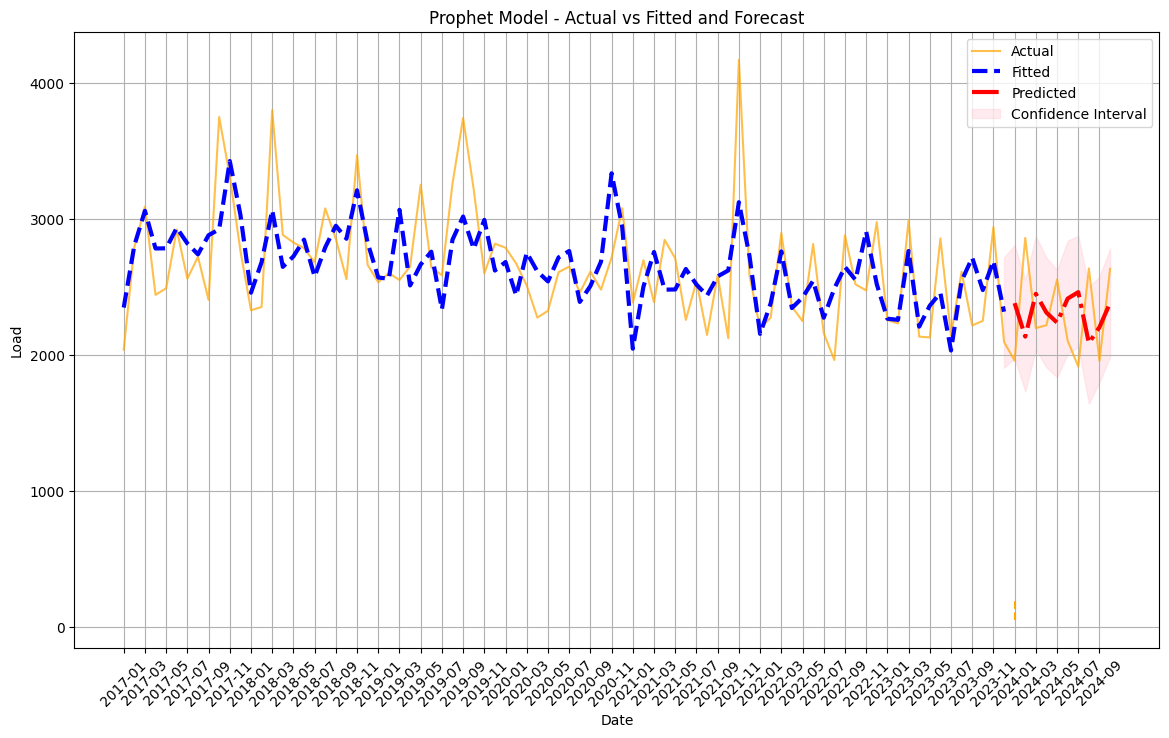

In [125]:
import matplotlib.dates as mdates

# Filter the dataset for plotting
tmp_data = data_check_metrics.fillna(0)
tmp_data = data_check_metrics.loc[data_check_metrics.Date > pd.to_datetime("2023-11-30")].fillna(190)
#tmp_data.loc[tmp_data["Date"] == pd.to_datetime("2023-12-01"), f"{main_column}_Prediction"] = data_check_metrics.loc[data_check_metrics["Date"] == pd.to_datetime("2023-12-01"), f"{main_column}_Fitted"]

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(data_check_metrics['Date_Graph'], data_check_metrics[main_column], label='Actual', 
         color="orange", alpha=0.7)
plt.plot(data_check_metrics['Date_Graph'], data_check_metrics[f"{main_column}_Fitted"], label='Fitted', color='blue', linestyle="dashed", linewidth=3)
plt.plot(data_check_metrics['Date_Graph'], data_check_metrics[f"{main_column}_Prediction"], label='Predicted', linestyle="dashdot", linewidth=3, color='red')
plt.vlines(x="2024-01", linestyles='--', color='orange', ymin=50, ymax=210)

#Add confidence intervals for predictions
plt.fill_between(tmp_data['Date_Graph'], 
                 tmp_data[f"{main_column}_Prediction_CI_low"], 
                 tmp_data[f"{main_column}_Prediction_CI_upp"], 
                 color='pink', alpha=0.3, label='Confidence Interval')

# Xticks
xticks = data_check_metrics['Date_Graph'][::2]  # Select every second tick
xtick_labels = [tick for tick in xticks]  # Convert to string
plt.xticks(xticks, xtick_labels, rotation=45)

# Add titles and labels
plt.title('Prophet Model - Actual vs Fitted and Forecast')
plt.xlabel('Date')
plt.ylabel('Load')
#plt.ylim(50, 230)
plt.legend()
plt.grid()
plt.show()

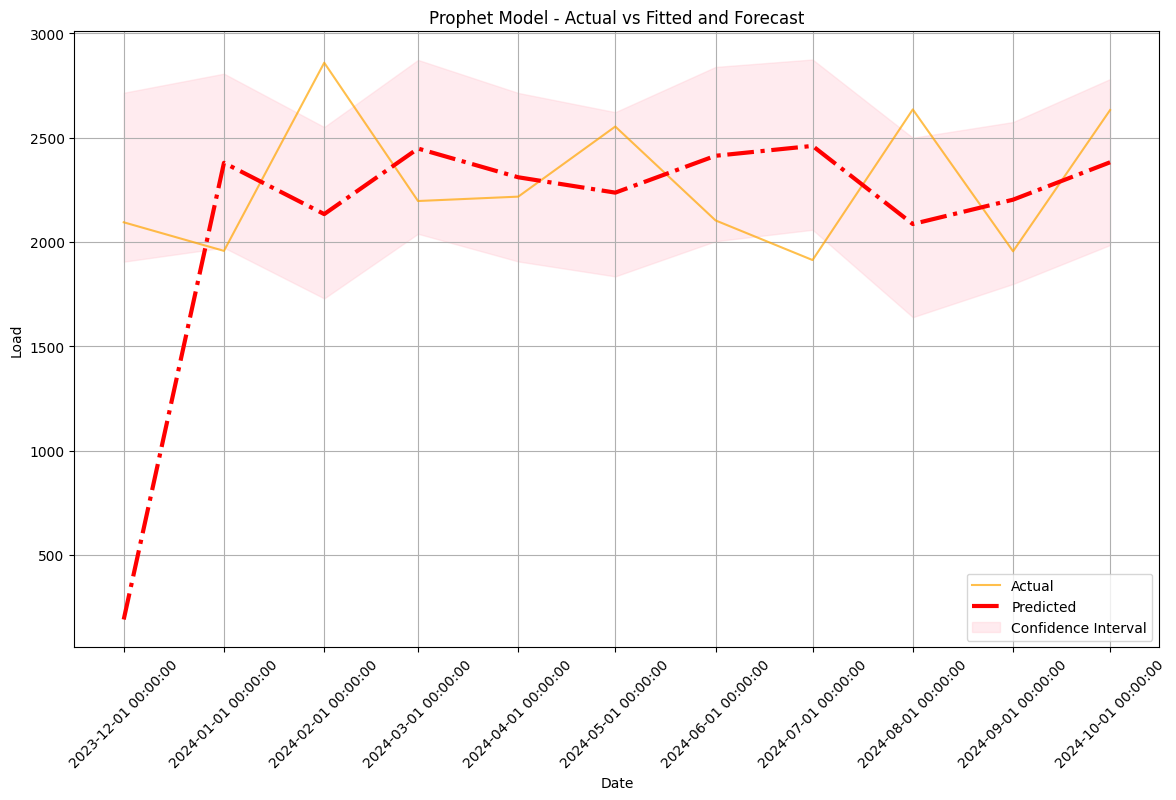

In [131]:
import matplotlib.dates as mdates

# Ensure Date_Graph is in datetime format
data_check_metrics['Date_Graph'] = pd.to_datetime(data_check_metrics['Date_Graph'], errors='coerce')

# Filter the dataset for plotting
tmp_data = data_check_metrics.loc[data_check_metrics.Date_Graph > pd.to_datetime("2023-11-30")].fillna(190)
# tmp_data.loc[tmp_data["Date"] == pd.to_datetime("2023-12-01"), 
#                 "Prolecheno_Prediction"] = data_check_metrics.loc[data_check_metrics["Date"] == pd.to_datetime("2023-12-01"), "Prolecheno_Fitted"]

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(tmp_data['Date_Graph'], tmp_data[main_column], label='Actual', 
         color="orange", alpha=0.7)
#plt.plot(tmp_data['Date_Graph'], tmp_data[f"{main_column}_Fitted"], label='Fitted', color='blue', linestyle="dashed", linewidth=3)
plt.plot(tmp_data['Date_Graph'], tmp_data[f"{main_column}_Prediction"], label='Predicted', linestyle="dashdot", linewidth=3, color='red')
#plt.vlines(x="2024-01", linestyles='--', color='orange', ymin=50, ymax=210)

#Add confidence intervals for predictions
plt.fill_between(tmp_data['Date_Graph'], 
                 tmp_data[f"{main_column}_Prediction_CI_low"], 
                 tmp_data[f"{main_column}_Prediction_CI_upp"], 
                 color='pink', alpha=0.3, label='Confidence Interval')

# Xticks
xticks = tmp_data['Date_Graph'][::1]  # Select every second tick
xtick_labels = [tick for tick in xticks]  # Convert to string
plt.xticks(xticks, xtick_labels, rotation=45)

# Add titles and labels
plt.title('Prophet Model - Actual vs Fitted and Forecast')
plt.xlabel('Date')
plt.ylabel('Load')
#plt.ylim(50, 230)
plt.legend()
plt.grid()
plt.show()

### Model Check

Mean Squared Error (MSE): 102068.5016
Mean Absolute Error (MAE): 248.1721
Root Mean Squared Error (RMSE): 319.4816


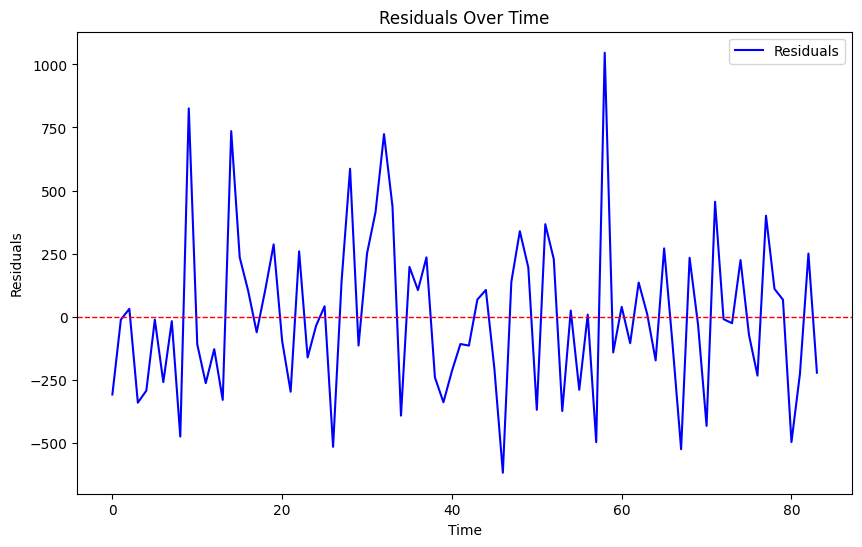

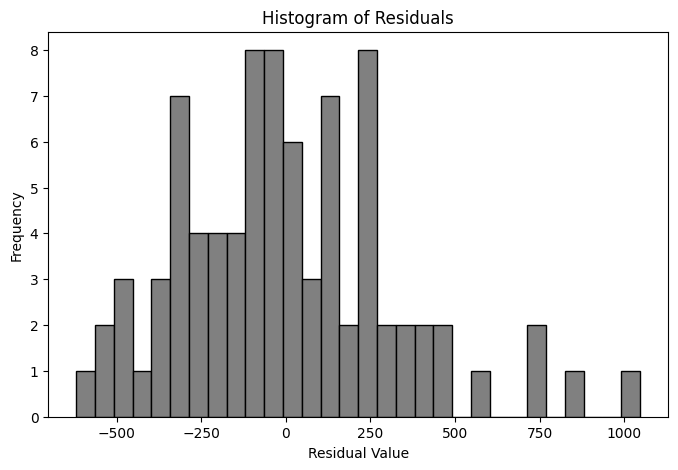

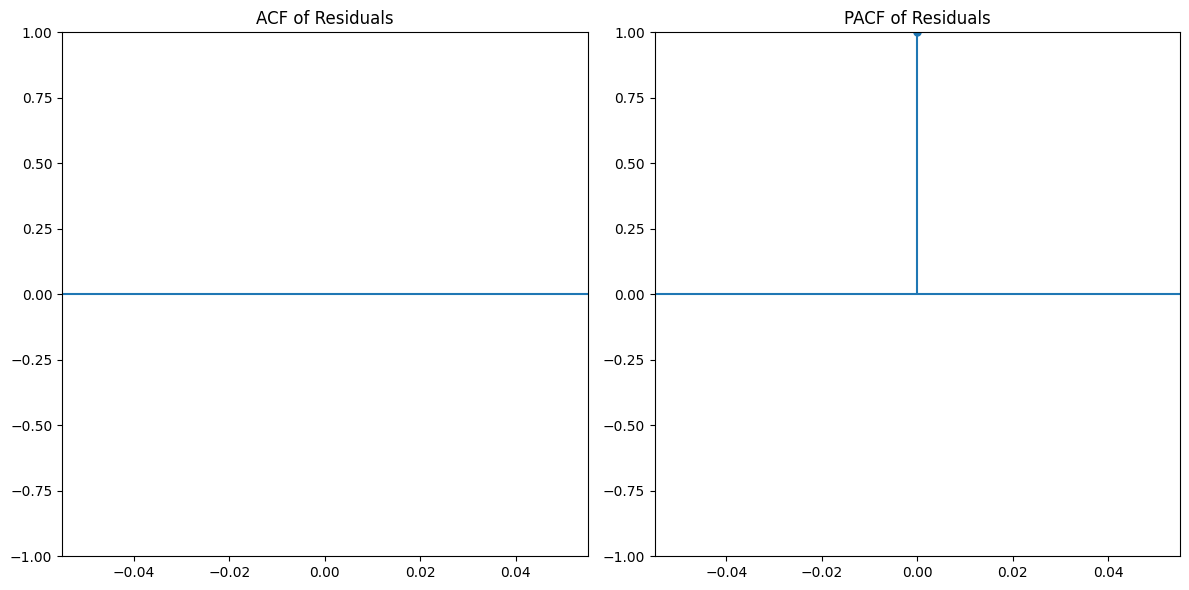

In [139]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assume `df` is your DataFrame with columns 'real' and 'fitted'
# Replace 'real' and 'fitted' with your actual column names
real = data_check_metrics[main_column].iloc[0:train_size]
fitted = data_check_metrics[f"{main_column}_Fitted"].iloc[0:train_size]

# Calculate residuals
data_check_metrics['residuals'] = real - fitted

# Calculate performance metrics
mse = mean_squared_error(real, fitted)
mae = mean_absolute_error(real, fitted)
rmse = mse ** 0.5

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Residuals plot
plt.figure(figsize=(10, 6))
plt.plot(data_check_metrics['residuals'], label='Residuals', color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(data_check_metrics['residuals'], bins=30, color='gray', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

# ACF and PACF of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(data_check_metrics['residuals'], lags=40, ax=plt.gca(), title="ACF of Residuals")
plt.subplot(1, 2, 2)
plot_pacf(data_check_metrics['residuals'], lags=40, ax=plt.gca(), title="PACF of Residuals")
plt.tight_layout()
plt.show()

In [142]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test on residuals
# df['residuals'] should already be computed
ljung_box_results = acorr_ljungbox(data_check_metrics['residuals'].dropna(), lags=[10], return_df=True)

# Display results
print(ljung_box_results)

     lb_stat  lb_pvalue
10  5.951151   0.819351


### Metrics

In [143]:
# Calculate metrics - train
mae = np.mean(np.abs(data_check_metrics[main_column] - data_check_metrics[f"{main_column}_Fitted"]))  # Mean Absolute Error
mse = np.mean((data_check_metrics[main_column] - data_check_metrics[f"{main_column}_Fitted"]) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mape = np.mean(np.abs((data_check_metrics[main_column] - data_check_metrics[f"{main_column}_Fitted"]) / data_check_metrics[main_column])) * 100  # Mean Absolute Percentage Error

# Print metrics
print("*** TRAIN ***")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

*** TRAIN ***
MAE: 248.17
MSE: 102068.50
RMSE: 319.48
MAPE: 9.20%


In [144]:
# Calculate metrics
mae = np.mean(np.abs(data_check_metrics[main_column] - data_check_metrics[f"{main_column}_Prediction"]))  # Mean Absolute Error
mse = np.mean((data_check_metrics[main_column] - data_check_metrics[f"{main_column}_Prediction"]) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mape = np.mean(np.abs((data_check_metrics[main_column] - data_check_metrics[f"{main_column}_Prediction"]) / data_check_metrics[main_column])) * 100  # Mean Absolute Percentage Error

# Print metrics
print("*** TEST ***")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

*** TEST ***
MAE: 371.32
MSE: 169826.09
RMSE: 412.10
MAPE: 16.14%
